In [60]:
# Pandas
import pandas as pd

# Numpy
import numpy as np

# Sklearn
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

# Extraindo a Base

In [61]:
base = pickle.load(open('./bases/interactions.pk1','rb'))

atributo = base[0].iloc[:, :-1]
resposta = base[0].iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(atributo, resposta, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Incluir idade e cidade
display(X_test)

,category,favorite,price,product_id,user_id
411,0.0,1.0,49.90,0.0,39.0
621,1.0,0.0,98.25,98.0,15.0
721,0.0,1.0,49.90,0.0,17.0
914,1.0,1.0,98.25,98.0,48.0
917,0.0,0.0,49.90,0.0,18.0
...,...,...,...,...,...
554,1.0,1.0,98.25,98.0,43.0
938,0.0,1.0,49.90,0.0,13.0
522,0.0,0.0,49.90,0.0,6.0
677,0.0,1.0,49.90,0.0,9.0


# Teste entre tipos de modelos

In [62]:
modelos = {}

# Arvore - Tree
parametros_tree = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5, 10],
    'max_features' : [None, 'sqrt', 'log2']
}

modelos['tree'] = [tree.DecisionTreeClassifier(), parametros_tree]

# KNN 
parametros_knn = {
    'n_neighbors' : np.arange(3, 20),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'kd_tree'],
    'leaf_size' : np.arange(10, 30, 5),
    'p' : [1, 2, 3],
    'metric' : ['minkowski', 'manhattan'],
    'n_jobs' : [1, -1]
}

modelos['knn'] = [KNeighborsClassifier(), parametros_knn]

In [63]:
infos = {}

for i in modelos.keys():
    grid = GridSearchCV(estimator=modelos[i][0], param_grid=modelos[i][1], scoring='f1', cv=5)

    grid.fit(X_train, y_train)

    resultados = grid.cv_results_
    best_index = grid.best_index_

    infos[i] = [
        grid.best_estimator_,
        resultados['mean_test_score'][best_index]
        ]

## Visualização dos resultados

In [64]:
fig_tree = go.Figure()

x = list(infos.keys())
y = list()

for i in x:
    y.append(infos[i][1])
y_formatted = [round(value, 3) for value in y]

fig_tree.add_bar(x=x, y=y, text=y_formatted, textposition='auto', textangle=-360)

fig_tree.update_layout(
    title='Performace dos modelos',
    xaxis_title='Bases',
    yaxis_title='F1 Score'
)

fig_tree.show()

# Teste para validação

In [65]:
melhor_modelo = infos['tree'][0]
melhor_modelo.fit(X_train, y_train)

y_pred = melhor_modelo.predict(X_val)

## Metricas

Reporte das Métricas que foram testadas:
               precision    recall  f1-score   support

           0       0.47      0.75      0.58        44
           1       0.63      0.34      0.44        56

    accuracy                           0.52       100
   macro avg       0.55      0.54      0.51       100
weighted avg       0.56      0.52      0.50       100

[[33 11]
 [37 19]]


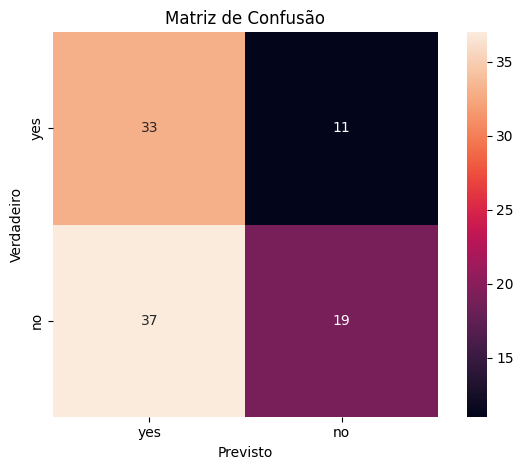

In [68]:
print("Reporte das Métricas que foram testadas:\n", classification_report(y_val, y_pred))

matriz_de_confusao = confusion_matrix(y_val, y_pred)
print(matriz_de_confusao)

sns.heatmap(matriz_de_confusao, square=True, annot=True, fmt='d', cbar=True,
            yticklabels=['yes','no'],
            xticklabels=['yes','no'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.show()

# Teste do Usuario

In [9]:


# products = [
#     {'product_id': 1, 'preco': 49.90, 'category': 'Brinquedos'}, 
#     {'product_id': 2, 'preco': 39.90, 'category': 'Roupas'}, 
#     {'product_id': 3, 'preco': 59.90, 'category': 'Livros'}
# ]

# product_features = []

# for i in range(len(X_test)):
#     for product in products:
#         product_features.append([
#             product['category'],
#             X_test.loc[i, 'favorite'],
#             product['preco'],
#             product['product_id'],
#             X_test.loc[i, 'user_id']
#         ])

# product_features_df = pd.DataFrame(product_features, columns=['category', 'favorite', 'preco', 'product_id', 'user_id',])

# product_features_df = pd.DataFrame(base[1].fit_transform(product_features_df), columns=base[1].get_feature_names_out())

# product_features_df = product_features_df.sort_index(axis=1)

# probabilities = melhor_modelo.predict_proba(product_features_df)[:, 1]

# for i in range(len(products)):
#     products[i]['probabilidade_consumo'] = probabilities[i]

# recommended_products = sorted(products, key=lambda x: x['probabilidade_consumo'], reverse=True)

# print("Lista de produtos recomendados (do mais provável ao menos provável):")
# for product in recommended_products:
#     print(f"Produto {product['product_id']} - Probabilidade de compra: {product['probabilidade_consumo']:.2f}")

In [67]:
import pandas as pd

products = [
    {'product_id': 1, 'price': 49.90, 'category': 'Brinquedos'}, 
    {'product_id': 2, 'price': 39.90, 'category': 'Roupas'}, 
    {'product_id': 3, 'price': 59.90, 'category': 'Livros'}, 
    {'product_id': 4, 'price': 19.90, 'category': 'Acessorios'}, 
    {'product_id': 5, 'price': 29.90, 'category': 'Materiais Escolares'}, 
    {'product_id': 6, 'price': 79.90, 'category': 'Moveis'}, 
    {'product_id': 7, 'price': 45.00, 'category': 'Jogos'}, 
    {'product_id': 8, 'price': 34.90, 'category': 'Tecnologia Educativa'}, 
    {'product_id': 9, 'price': 89.90, 'category': 'Bolsas e Mochilas'}, 
    {'product_id': 10, 'price': 9.99, 'category': 'Artes'}, 
    {'product_id': 11, 'price': 19.99, 'category': 'Decoracao'}, 
    {'product_id': 12, 'price': 5.50, 'category': 'Fantasia'}, 
    {'product_id': 13, 'price': 24.90, 'category': 'Esportes'}, 
    {'product_id': 14, 'price': 14.90, 'category': 'Brinquedos'}, 
    {'product_id': 15, 'price': 99.90, 'category': 'Roupas'}, 
    {'product_id': 16, 'price': 15.99, 'category': 'Livros'}, 
    {'product_id': 17, 'price': 7.50, 'category': 'Acessorios'}, 
    {'product_id': 18, 'price': 12.99, 'category': 'Materiais Escolares'}, 
    {'product_id': 19, 'price': 22.50, 'category': 'Moveis'}, 
    {'product_id': 20, 'price': 32.75, 'category': 'Jogos'}, 
    {'product_id': 21, 'price': 41.25, 'category': 'Tecnologia Educativa'}, 
    {'product_id': 22, 'price': 58.00, 'category': 'Bolsas e Mochilas'}, 
    {'product_id': 23, 'price': 68.30, 'category': 'Artes'}, 
    {'product_id': 24, 'price': 73.95, 'category': 'Decoracao'}, 
    {'product_id': 25, 'price': 82.10, 'category': 'Fantasia'}, 
    {'product_id': 26, 'price': 90.00, 'category': 'Esportes'}, 
    {'product_id': 27, 'price': 95.50, 'category': 'Brinquedos'}, 
    {'product_id': 28, 'price': 11.45, 'category': 'Roupas'}, 
    {'product_id': 29, 'price': 16.80, 'category': 'Livros'}, 
    {'product_id': 30, 'price': 21.60, 'category': 'Acessorios'}, 
    {'product_id': 31, 'price': 27.50, 'category': 'Materiais Escolares'}, 
    {'product_id': 32, 'price': 33.90, 'category': 'Moveis'}, 
    {'product_id': 33, 'price': 48.25, 'category': 'Jogos'}, 
    {'product_id': 34, 'price': 54.99, 'category': 'Tecnologia Educativa'}, 
    {'product_id': 35, 'price': 61.40, 'category': 'Bolsas e Mochilas'}, 
    {'product_id': 36, 'price': 75.00, 'category': 'Artes'}, 
    {'product_id': 37, 'price': 88.80, 'category': 'Decoracao'}, 
    {'product_id': 38, 'price': 14.75, 'category': 'Fantasia'}, 
    {'product_id': 39, 'price': 20.99, 'category': 'Esportes'}, 
    {'product_id': 40, 'price': 30.00, 'category': 'Brinquedos'}, 
    {'product_id': 41, 'price': 36.40, 'category': 'Roupas'}, 
    {'product_id': 42, 'price': 42.90, 'category': 'Livros'}, 
    {'product_id': 43, 'price': 53.70, 'category': 'Acessorios'}, 
    {'product_id': 44, 'price': 60.00, 'category': 'Materiais Escolares'}, 
    {'product_id': 45, 'price': 66.60, 'category': 'Moveis'}, 
    {'product_id': 46, 'price': 77.50, 'category': 'Jogos'}, 
    {'product_id': 47, 'price': 85.25, 'category': 'Tecnologia Educativa'}, 
    {'product_id': 48, 'price': 92.75, 'category': 'Bolsas e Mochilas'}, 
    {'product_id': 49, 'price': 18.50, 'category': 'Artes'}, 
    {'product_id': 50, 'price': 29.50, 'category': 'Decoracao'}, 
    {'product_id': 51, 'price': 4.99, 'category': 'Fantasia'}, 
    {'product_id': 52, 'price': 8.75, 'category': 'Esportes'}, 
    {'product_id': 53, 'price': 13.49, 'category': 'Brinquedos'}, 
    {'product_id': 54, 'price': 17.00, 'category': 'Roupas'}, 
    {'product_id': 55, 'price': 23.99, 'category': 'Livros'}, 
    {'product_id': 56, 'price': 26.99, 'category': 'Acessorios'}, 
    {'product_id': 57, 'price': 31.50, 'category': 'Materiais Escolares'}, 
    {'product_id': 58, 'price': 35.00, 'category': 'Moveis'}, 
    {'product_id': 59, 'price': 40.00, 'category': 'Jogos'}, 
    {'product_id': 60, 'price': 43.99, 'category': 'Tecnologia Educativa'}, 
    {'product_id': 61, 'price': 47.75, 'category': 'Bolsas e Mochilas'}, 
    {'product_id': 62, 'price': 50.50, 'category': 'Artes'}, 
    {'product_id': 63, 'price': 52.00, 'category': 'Decoracao'}, 
    {'product_id': 64, 'price': 55.50, 'category': 'Fantasia'}, 
    {'product_id': 65, 'price': 62.50, 'category': 'Esportes'}, 
    {'product_id': 66, 'price': 67.00, 'category': 'Brinquedos'}, 
    {'product_id': 67, 'price': 70.99, 'category': 'Roupas'}, 
    {'product_id': 68, 'price': 72.25, 'category': 'Livros'}, 
    {'product_id': 69, 'price': 76.00, 'category': 'Acessorios'}, 
    {'product_id': 70, 'price': 80.50, 'category': 'Materiais Escolares'}, 
    {'product_id': 71, 'price': 83.00, 'category': 'Moveis'}, 
    {'product_id': 72, 'price': 86.40, 'category': 'Jogos'}, 
    {'product_id': 73, 'price': 91.00, 'category': 'Tecnologia Educativa'}, 
    {'product_id': 74, 'price': 93.40, 'category': 'Bolsas e Mochilas'}, 
    {'product_id': 75, 'price': 96.30, 'category': 'Artes'}, 
    {'product_id': 76, 'price': 97.50, 'category': 'Decoracao'}, 
    {'product_id': 77, 'price': 10.50, 'category': 'Fantasia'}, 
    {'product_id': 78, 'price': 15.25, 'category': 'Esportes'}, 
    {'product_id': 79, 'price': 18.75, 'category': 'Brinquedos'}, 
    {'product_id': 80, 'price': 20.00, 'category': 'Roupas'}, 
    {'product_id': 81, 'price': 25.00, 'category': 'Livros'}, 
    {'product_id': 82, 'price': 28.00, 'category': 'Acessorios'}, 
    {'product_id': 83, 'price': 33.00, 'category': 'Materiais Escolares'}, 
    {'product_id': 84, 'price': 37.50, 'category': 'Moveis'}, 
    {'product_id': 85, 'price': 44.50, 'category': 'Jogos'}, 
    {'product_id': 86, 'price': 46.00, 'category': 'Tecnologia Educativa'}, 
    {'product_id': 87, 'price': 49.00, 'category': 'Bolsas e Mochilas'}, 
    {'product_id': 88, 'price': 51.00, 'category': 'Artes'}, 
    {'product_id': 89, 'price': 56.25, 'category': 'Decoracao'}, 
    {'product_id': 90, 'price': 63.50, 'category': 'Fantasia'}, 
    {'product_id': 91, 'price': 64.75, 'category': 'Esportes'}, 
    {'product_id': 92, 'price': 69.00, 'category': 'Brinquedos'}, 
    {'product_id': 93, 'price': 74.00, 'category': 'Roupas'}, 
    {'product_id': 94, 'price': 78.99, 'category': 'Livros'}, 
    {'product_id': 95, 'price': 81.25, 'category': 'Acessorios'}, 
    {'product_id': 96, 'price': 84.75, 'category': 'Materiais Escolares'}, 
    {'product_id': 97, 'price': 88.25, 'category': 'Moveis'}, 
    {'product_id': 98, 'price': 94.00, 'category': 'Jogos'}, 
    {'product_id': 99, 'price': 98.25, 'category': 'Tecnologia Educativa'}
]

product_features = []

teste = X_test.reset_index()

for i in range(0, len(teste)):
    for product in products:
        product_features.append([
            product['category'],
            teste['favorite'][i],
            product['price'],
            product['product_id'],
            teste['user_id'][i]
        ])

product_features_df = pd.DataFrame(product_features, columns=['category', 'favorite', 'price', 'product_id', 'user_id'])

transformador = base[1]

df_transformado2 = pd.DataFrame(transformador.transform(product_features_df), columns=transformador.get_feature_names_out())

product_features_df = df_transformado2.sort_index(axis=1)

probabilities = melhor_modelo.predict_proba(product_features_df)[:, 1]

for i in range(len(products)):
    products[i]['probabilidade_consumo'] = probabilities[i]

recommended_products = sorted(products, key=lambda x: x['probabilidade_consumo'], reverse=True)

recommended_products = recommended_products[:5]

print("Lista de produtos recomendados (do mais provável ao menos provável):")
for product in recommended_products:
    print(f"Produto {product['product_id']} - Probabilidade de compra: {product['probabilidade_consumo']:.2f}")

Lista de produtos recomendados (do mais provável ao menos provável):
Produto 1 - Probabilidade de compra: 0.49
Produto 2 - Probabilidade de compra: 0.49
Produto 3 - Probabilidade de compra: 0.49
Produto 4 - Probabilidade de compra: 0.49
Produto 5 - Probabilidade de compra: 0.49
